                        # TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

1. Data Exploration and Preprocessing

####	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [1]:
import pandas as pd
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
# Basic exploration
print("Dataset shape:", df.shape)
print("\nFirst few rows:\n", df.columns)

# Dataset info
print(df.info())

# Class distribution
print(df['Labels'].value_counts())

Dataset shape: (2000, 2)

First few rows:
 Index(['Data', 'Labels'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk

#### Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gajul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gajul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [5]:

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


# Apply to Data column
df['Clean_Data'] = df['Data'].apply(preprocess_text)

print(df[['Data', 'Clean_Data']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                          Clean_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


#### Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model,
1. using techniques such as TF-IDF.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the cleaned data
X = tfidf.fit_transform(df['Clean_Data'])

# Target labels
y = df['Labels']

print(f"Feature shape: {X.shape}")

Feature shape: (2000, 56432)


## 2. Naive Bayes Model for Text Classification

#### Split the data into training and test sets.

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1600, 56432)
Test set size: (400, 56432)


#### Implement a Naive Bayes classifier to categorize the blog posts into their respective categories.
#### You can use libraries like scikit-learn for this purpose.

In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
# •	Train the model on the training set and make predictions on the test set.

In [10]:
# Predict on test set
y_pred = nb_model.predict(X_test)

In [11]:
# 3. Sentiment Analysis

In [12]:
# Choose a suitable library or method for performing sentiment analysis on the blog post texts.

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.825

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.78      0.70      0.74        20
           comp.graphics       0.89      0.80      0.84        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.70      0.78        20
          comp.windows.x       0.89      0.80      0.84        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.90      0.90      0.90        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.9

In [14]:
# Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the 
# Data column and get the sentiment for each blog.

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
from textblob import TextBlob
import pandas as pd

df

,Data,Labels,Clean_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...


In [17]:
# •	Examine the distribution of sentiments across different categories and summarize your findings.

In [18]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function
df['Polarity'] = df['Data'].apply(get_sentiment)

# Define sentiment based on polarity score
def categorize_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

print(df[['Data', 'Polarity', 'Sentiment']].head())

                                                Data  Polarity Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  0.072213   Neutral
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv.... -0.053757   Neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  0.093119   Neutral
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  0.055008   Neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  0.132183  Positive


In [19]:
# Sentiment count overall
sentiment_counts = df['Sentiment'].value_counts()
print("\nOverall Sentiment Distribution:\n", sentiment_counts)

# Sentiment distribution by category
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
print("\nSentiment Distribution by Category:\n", sentiment_by_category)


Overall Sentiment Distribution:
 Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64

Sentiment Distribution by Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                        

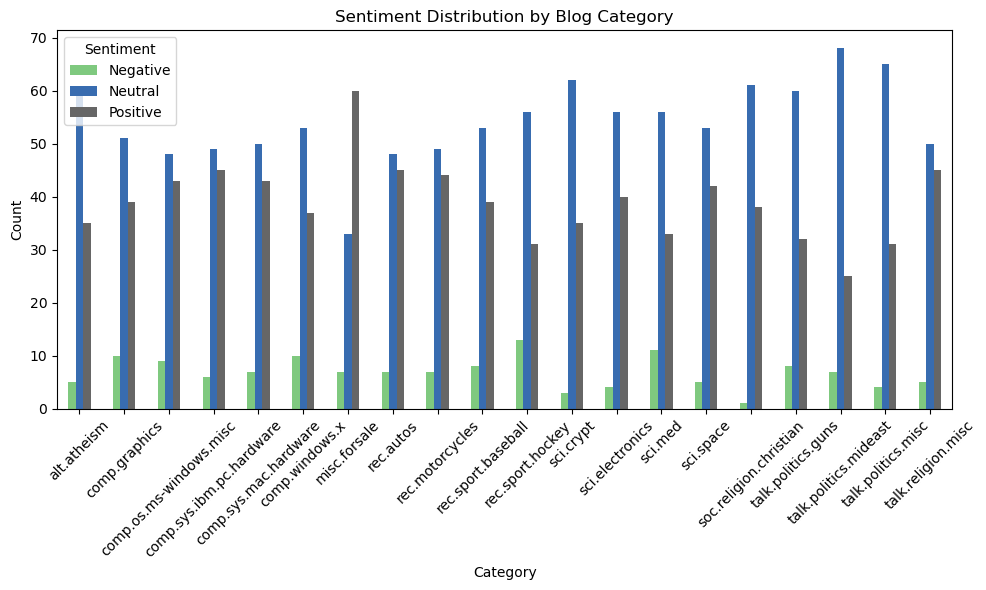

In [20]:
import matplotlib.pyplot as plt

# Bar plot for sentiment by category
sentiment_by_category.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Sentiment Distribution by Blog Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# 4. Evaluation

In [22]:
# Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Output metrics
print("Naive Bayes Classifier Performance:")
print(f"✔ Accuracy:  {accuracy:.4f}")
print(f"✔ Precision: {precision:.4f}")
print(f"✔ Recall:    {recall:.4f}")
print(f"✔ F1-score:  {f1:.4f}")

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

Naive Bayes Classifier Performance:
✔ Accuracy:  0.8250
✔ Precision: 0.8349
✔ Recall:    0.8250
✔ F1-score:  0.8253

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.70      0.74        20
           comp.graphics       0.89      0.80      0.84        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.70      0.78        20
          comp.windows.x       0.89      0.80      0.84        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.90      0.90      0.90        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.87      1.00      0.93        20


### Discuss the performance of the model and any challenges encountered during the classification process.

In [24]:
# •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

In [25]:
# Sentiment trend by category
sentiment_summary = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

print("Sentiment Proportion by Blog Category:\n")
print(sentiment_summary)


Sentiment Proportion by Blog Category:

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.05     0.60      0.35
comp.graphics                 0.10     0.51      0.39
comp.os.ms-windows.misc       0.09     0.48      0.43
comp.sys.ibm.pc.hardware      0.06     0.49      0.45
comp.sys.mac.hardware         0.07     0.50      0.43
comp.windows.x                0.10     0.53      0.37
misc.forsale                  0.07     0.33      0.60
rec.autos                     0.07     0.48      0.45
rec.motorcycles               0.07     0.49      0.44
rec.sport.baseball            0.08     0.53      0.39
rec.sport.hockey              0.13     0.56      0.31
sci.crypt                     0.03     0.62      0.35
sci.electronics               0.04     0.56      0.40
sci.med                       0.11     0.56      0.33
sci.space                     0.05     0.53      0.42
soc.religion.christian        0.01     0.6

### Interpretation:
1. Categories with mostly positive sentiment might contain uplifting or persuasive content (e.g., travel, food, motivation).
2. Negative sentiment dominance may suggest topics on politics, social issues, or reviews.
3. Neutral tone might imply informational or technical blogs.

### Implications:
1. Marketing: Knowing which categories are more positively received can guide content creation.
2. Moderation: Categories with excessive negativity might need review or moderation.
3. Model insight: Categories with mixed sentiment could confuse the classifier—sentiment might indirectly affect label prediction.